# Machine Learning and Data Analysis Project

### Project - Object detection and Classification using Convolutional Neural Networks on CIFAR-10

---


The Project is focusing on the investigating the influence of various hyperparameters on Convolutional Neural Network (CNN) performance for image classification, We Have Used the CIFAR-10 dataset.

CIFAR-10 consists of 60,000 tiny 32 × 32 color (RGB) images, labeled with an integer corresponding to 1 of 10 classes: airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), and truck (9).1 Nowadays, CIFAR-10 is considered too simple for developing or validating new research, but it serves our learning purposes just fine. We will use the torchvision module to automatically download the dataset and load it as a collection of PyTorch tensors. Figure 7.1 gives us a taste of CIFAR-10.

1. The images were collected and labeled by Krizhevsky, Nair, and Hinton of the Canadian Institute For Advanced Research (CIFAR) and were drawn from a larger collection of unlabeled 32 × 32 color images: the “80 million tiny images dataset” from the Computer Science and Artificial Intelligence Laboratory (CSAIL) at the Massachusetts Institute of Technology.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.






In [ ]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import f1_score, recall_score


from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from PIL import Image





# LOAD DATA

In the beginning of our study on the CIFAR-10 dataset by loading the images using the cifar10.load_data() function. This function makes  automatically downloads for the dataset and splits it into training and validation sets.

In [ ]:
#load data into training and validation batches
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



170498071/170498071 [==============================] - 13s 0us/step


# Preprocessing

The preprocessing steps involve standardizing pixel values to a range of 0 to 1 and converting class labels into binary matrices using one-hot encoding. This ensures that the model receives consistent input and produces predictions formatted for multi-class classification. Additionally, a subset of training images is visualized to gain insights into the dataset's content and quality. These steps set the stage for exploring different CNN architectures and hyperparameters to optimize performance on CIFAR-10.




In the preprocessing step, pixel values ​are standardized to 0 to 1 and class labels are converted to a binary matrix using one-hot encoding.

This ensures that the model receives consistent input and provides structured predictions for multi-class classification. In addition, a subset of the training images is visualized to gain insight into the content and quality of the dataset.
This step allows to examine extreme CNN settings and parameters to improve performance in CIFAR-10.

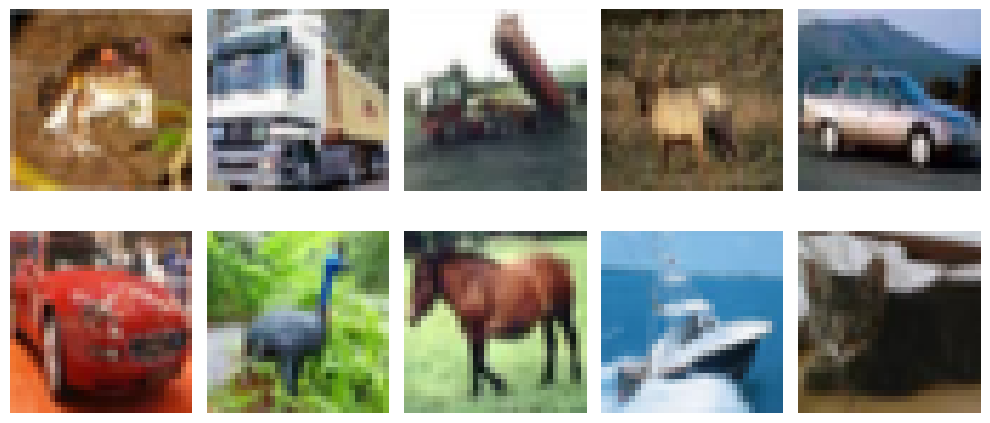

In [ ]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Plot some examples from the training set
f, ax = plt.subplots(2, 5, figsize=(10, 5))
k = 0
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(x_train[k], interpolation='nearest')  # We use interpolation nearest to reduce the blurinng effect CIFAR-10 images do not need reshaping and are RGB by default
        ax[i, j].axis('off')  # Hide the axis
        k += 1
plt.tight_layout()
plt.show()


In [ ]:
rmalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_no,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False
)

# Validation Split and Image Augmentation
In validation split and augmentation, we use important techniques to improve the performance of our Convolutional Neural Network (CNN) model.

The validation partition divides our dataset into specific training and validation subsets. The training subset is used to optimize the model parameters, while the validation subset examines the model’s performance on unseen data, checking for generalizability At the same time, enhancement techniques such as rotation, zooming and flipping is used in the training image. These enhancements increase the size of the dataset, enabling the model to recognize complex features and patterns, which is important for accurate classification in a variety of real-world situations Together these techniques enable CNN to be more efficient at in solving complex image recognition tasks.

In [ ]:
train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    validation_split=0.2
)

In [ ]:
test_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False
)

In [ ]:
train_images = train_datagen.flow(
    x=x_train,
    y=y_train,
    subset="training",
    batch_size=32
)

In [ ]:
val_images = train_datagen.flow(
    x=x_train,
    y=y_train,
    subset="validation",
    batch_size=32
)

test_images = test_datagen.flow(
    x=x_test,
    y=y_test,
    batch_size=32
)

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=3)
optimizer = Adam(learning_rate=0.001)


# CONVOLUTIONAL NEURAL NETWORK THIS PARAGRAPH SHOULD BE DELETED AND REWRITTEN BY KARIM

Convolutional neural networks (CNNs) are a type of artificial neural network that are most commonly used for analyzing visual imagery, such as images, videos, or computer vision tasks. CNNs can also be applied to other types of data, such as speech, audio, or text, that have a spatial or temporal structure.

CNNs are composed of multiple layers that process the input data in a sequential manner, learning hierarchical features and patterns from the data. The main characteristic of CNNs is that they use a mathematical operation called convolution in at least one of their layers, instead of general matrix multiplication. Convolution is a way of applying a filter or a kernel to the input data, which extracts local features and reduces the number of parameters and computations. Convolution can be seen as a sliding window that moves over the input data and produces an output called a feature map.

CNNs typically have three main types of layers: convolutional layers, pooling layers, and fully-connected layers. Each type of layer has a different function and role in the network.

* Convolutional layers are the core building blocks of CNNs. They apply one or more convolutional filters to the input data and produce feature maps that capture the local patterns in the data. Convolutional layers can have different parameters, such as the number, size, and stride of the filters, the padding of the input, and the activation function. Convolutional layers can be stacked on top of each other to form deeper networks that learn more complex and abstract features.

* Pooling layers are another type of layer that are often used after convolutional layers. They perform a downsampling operation on the feature maps, which reduces their spatial dimensions and makes the network more invariant to small translations or distortions in the input. Pooling layers can have different types, such as max pooling, average pooling, or global pooling, depending on how they aggregate the values in each region of the feature map.

* Fully-connected layers are the final type of layer that are usually used at the end of the network. They perform a linear transformation on the flattened vector that comes from the previous layer and produce an output vector that represents the class scores or probabilities for each possible outcome. Fully-connected layers can also have an activation function, such as softmax or sigmoid, to normalize the output.

# MODEL 1: baseline model
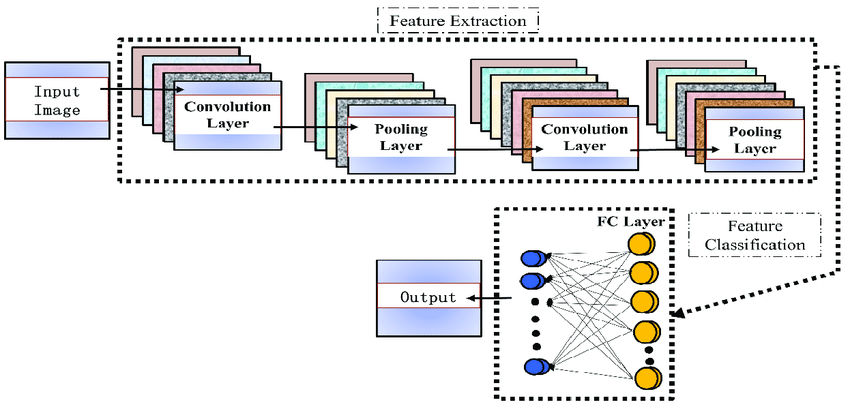

                figure 1: General CNN structure

The following is the baseline CNN model which was built based on the general stucture of a CNN, as shown in the figure above. In the further models, hyperparameters will be changed or added to the baseline model to study the respective results:


**Convolutional Layer**
  > *Filters: 32*

  >*Filter Size: 3x3*

**Max Pooling Layer**

 >*Pool Size: 2x2*

**Convolutional Layer**
  >*Filters: 64*

  >*Filter Size: 3x3*

**Max Pooling Layer**
>*Pool Size: 2x2*

**Flatten Layer**

**Output Layer**
>*Neurons: 10*
>*Activation: Softmax*






In [ ]:
model1 = Sequential([
        # First Convolutional Layer
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        # Maxpolling layer
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Layer
        layers.Conv2D(64, (3, 3), activation="relu"),
        # Maxpolling layer
        layers.MaxPooling2D((2, 2)),

        # Flatten the results to feed into the output layer
        layers.Flatten(),

        # Output Layer
        layers.Dense(10, activation="softmax")
    ])

#initiate AGAIN the optimizer
optimizer = Adam(learning_rate=0.001)


 #Complile and Train model
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer.build(model1.trainable_variables)
history1 = model1.fit(train_images, batch_size=128, epochs=10, validation_data=val_images, callbacks=[callback])


Epoch 1/10
1250/1250 [==============================] - 83s 66ms/step - loss: 1.6378 - accuracy: 0.4086 - val_loss: 1.4324 - val_accuracy: 0.4832
Epoch 2/10
1250/1250 [==============================] - 72s 58ms/step - loss: 1.3772 - accuracy: 0.5132 - val_loss: 1.3236 - val_accuracy: 0.5342
Epoch 3/10
1250/1250 [==============================] - 73s 59ms/step - loss: 1.2696 - accuracy: 0.5568 - val_loss: 1.2136 - val_accuracy: 0.5751
Epoch 4/10
 231/1250 [====>.........................] - ETA: 52s - loss: 1.2204 - accuracy: 0.5782

KeyboardInterrupt: 

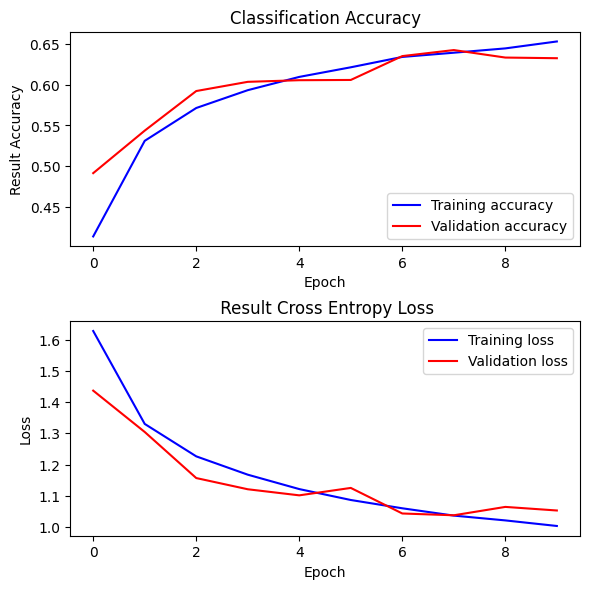

In [ ]:
#Visualize results loss function vs accuracy on the validation dataset
plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history1.history['val_accuracy'], color='red', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Result Accuracy')
plt.legend()
plt.subplot(212)
plt.title(' Result Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='Training loss')
plt.plot(history1.history['val_loss'], color='red', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35)


In [ ]:
#as a last step, test the model on the testing dataset which is different from the validation dataset
loss1, accuracy1 = model1.evaluate(test_images)
print(f"Results on Testing dataset: loss {loss1}, Accuracy: {accuracy1}")





313/313 [==============================] - 1s 4ms/step - loss: 0.9395 - accuracy: 0.6830
Results on Testing dataset: loss 0.9395450949668884, Accuracy: 0.6830000281333923


In [ ]:
#compute recall and f1score scores
predictions = model1.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_truth = np.argmax(y_test, axis=1)

f1score1 = f1_score(y_truth, y_pred, average='weighted')
recall1 = recall_score(y_truth, y_pred, average='weighted')
print(f"Results on Testing dataset: Weighted F1-score: {f1score1}, Weighted Recall: {recall1}")



313/313 [==============================] - 1s 2ms/step
Results on Testing dataset: Weighted F1-score: 0.6770020677744986, Weighted Recall: 0.683


In [ ]:
#saving results on testing dataset: loss1: 0.9395 - accuracy1: 0.6830
loss1=  0.9395
accuracy1= 0.6830
#saving results on testing dataset: Weighted F1-score: 0.6770020677744986, Weighted Recall: 0.683
f1score1= 0.6770020677744986
recall1= 0.683

#Model 1 Evaluation
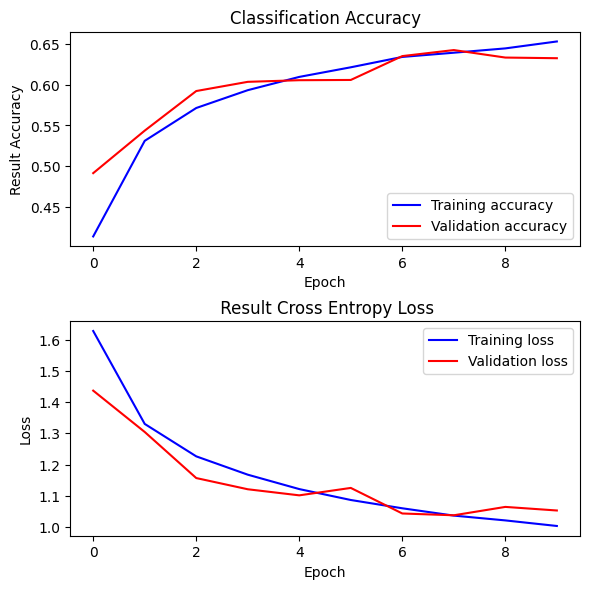

>!!on training and validation data: loss: 1.0030 - accuracy: 0.6531 - val_loss: 1.0526 - val_accuracy: 0.6325



# MODEL 2: Filter Size Hyperparameter

In Model 2, the kernel or filter size was increased from 3x3 in the baseline model to 7x7:

**Convolutional Layer**
  > *Filters: 32*

  >*Filter Size: 7x7*

**Max Pooling Layer**

 >*Pool Size: 2x2*

**Convolutional Layer**
  >*Filters: 64*

  >*Filter Size: 7x7*

**Max Pooling Layer**
>*Pool Size: 2x2*

**Flatten Layer**

**Output Layer**
>*Neurons: 10*
>*Activation: Softmax*


In [ ]:
model2 = Sequential([
        # First Convolutional Layer
        layers.Conv2D(32, (7, 7), activation="relu", input_shape=(32, 32, 3)),
        # Maxpolling layer
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Layer
        layers.Conv2D(64, (7, 7), activation="relu"),
        # Maxpolling layer
        layers.MaxPooling2D((2, 2)),

        # Flatten the results to feed into the output layer
        layers.Flatten(),

        # Output Layer
        layers.Dense(10, activation="softmax")
    ])

#initiate AGAIN the optimizer
optimizer = Adam(learning_rate=0.001)


 #Complile and Train model
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer.build(model2.trainable_variables)
history2 = model2.fit(train_images, batch_size=128, epochs=10, validation_data=val_images, callbacks=[callback])


Epoch 1/10
1250/1250 [==============================] - 31s 24ms/step - loss: 1.7904 - accuracy: 0.3443 - val_loss: 1.6291 - val_accuracy: 0.4122
Epoch 2/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.5700 - accuracy: 0.4335 - val_loss: 1.4990 - val_accuracy: 0.4580
Epoch 3/10
1250/1250 [==============================] - 33s 26ms/step - loss: 1.4851 - accuracy: 0.4676 - val_loss: 1.4660 - val_accuracy: 0.4767
Epoch 4/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.4379 - accuracy: 0.4841 - val_loss: 1.4346 - val_accuracy: 0.4826
Epoch 5/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.4036 - accuracy: 0.5013 - val_loss: 1.3856 - val_accuracy: 0.5059
Epoch 6/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.3801 - accuracy: 0.5094 - val_loss: 1.3378 - val_accuracy: 0.5220
Epoch 7/10
1250/1250 [==============================] - 35s 28ms/step - loss: 1.3555 - accuracy: 0.5173 - val_loss: 1.3697 -

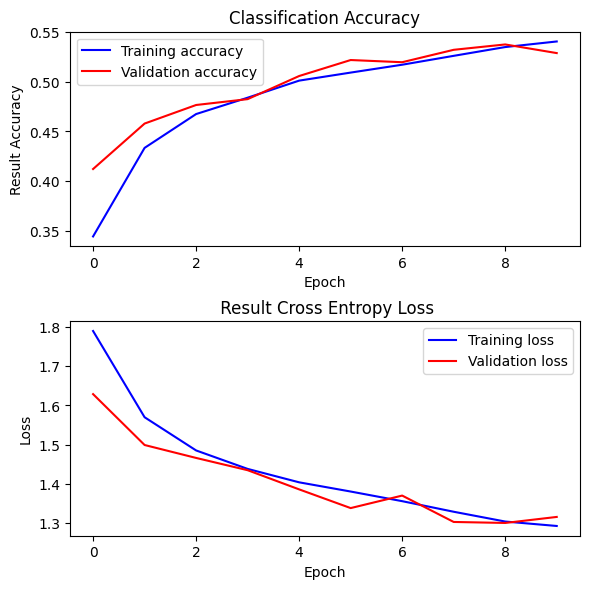

In [ ]:
#Visualize results loss function vs accuracy on the validation dataset
plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history2.history['val_accuracy'], color='red', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Result Accuracy')
plt.legend()
plt.subplot(212)
plt.title(' Result Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='Training loss')
plt.plot(history2.history['val_loss'], color='red', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35)

In [ ]:
#as a last step, test the model on the testing dataset which is different from the validation dataset
loss2, accuracy2 = model2.evaluate(test_images)
print(f"Results on Testing dataset: loss {loss2}, Accuracy: {accuracy2}")




313/313 [==============================] - 1s 4ms/step - loss: 1.1985 - accuracy: 0.5712
Results on Testing dataset: loss 1.198524832725525, Accuracy: 0.5712000131607056


In [ ]:
#compute recall and f1score scores
predictions = model2.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_truth = np.argmax(y_test, axis=1)

f1score2 = f1_score(y_truth, y_pred, average='weighted')
recall2 = recall_score(y_truth, y_pred, average='weighted')
print(f"Results on Testing dataset: Weighted F1-score: {f1score2}, Weighted Recall: {recall2}")




313/313 [==============================] - 1s 2ms/step
Results on Testing dataset: Weighted F1-score: 0.5699110620580048, Weighted Recall: 0.5712


In [ ]:
#SAVING RESULTS on testing dataset: loss2: 1.1985 - accuracy2: 0.5712
loss2= 1.1985
accuracy2= 0.5712
#saving results on testing dataset:  F1-score2: 0.5699110620580048, Weighted Recall2: 0.5712
f1score2= 0.5699110620580048
recall2=  0.5712

#Model 2 Evaluation

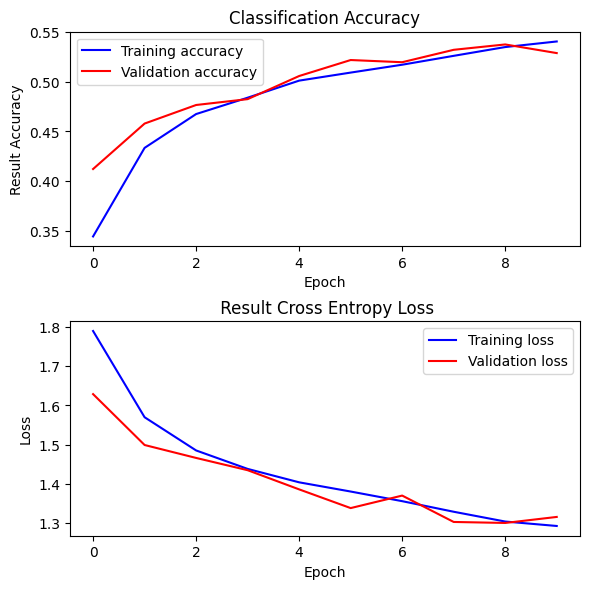



ON TRAINING AND VALIDATION DATASETS>> loss: 1.2921 - accuracy: 0.5407 - val_loss: 1.3152 - val_accuracy: 0.5290

SHORT PARAGRAPH (3 LINES) there is improvement/no improvement on loss/accuracy on traininig/validation sets >> derive a short conclusion on the effect of the hyperparamet on the efficiency of the model


# MODEL 3: Number of Convolutional Layer

In Model 3, two additional convolutional layers were added to the baseline model, thus in total four convolutional layers:

**Convolutional Layer**
  > *Filters: 32*

  >*Filter Size: 3x3*

**Max Pooling Layer**

 >*Pool Size: 2x2*

**Convolutional Layer**
  >*Filters: 64*

  >*Filter Size: 3x3*

**Max Pooling Layer**
>*Pool Size: 2x2*

**Convolutional Layer**
  >*Filters: 64*

  >*Filter Size: 3x3*

**Max Pooling Layer**
>*Pool Size: 2x2*

**Convolutional Layer**
  >*Filters: 64*

  >*Filter Size: 3x3*

**Max Pooling Layer**
>*Pool Size: 2x2*

**Flatten Layer**

**Output Layer**
>*Neurons: 10*
>*Activation: Softmax*


In [ ]:
model3 = Sequential([
        layers.Conv2D(32, (3, 3), activation="relu",  padding='same', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu" , padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu" , padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation="relu" , padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax")
    ])


optimizer = Adam(learning_rate=0.001)
optimizer.build(model3.trainable_variables)
callback = EarlyStopping(monitor='val_loss', patience=3)


model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(train_images, batch_size=128, epochs=10, validation_data=val_images, callbacks=[callback])


Epoch 1/10
1250/1250 [==============================] - 39s 28ms/step - loss: 1.6324 - accuracy: 0.4043 - val_loss: 1.3306 - val_accuracy: 0.5241
Epoch 2/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2300 - accuracy: 0.5591 - val_loss: 1.1659 - val_accuracy: 0.5803
Epoch 3/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.0597 - accuracy: 0.6244 - val_loss: 1.0073 - val_accuracy: 0.6382
Epoch 4/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.9531 - accuracy: 0.6645 - val_loss: 0.9979 - val_accuracy: 0.6457
Epoch 5/10
1250/1250 [==============================] - 32s 26ms/step - loss: 0.8794 - accuracy: 0.6885 - val_loss: 0.9056 - val_accuracy: 0.6739
Epoch 6/10
1250/1250 [==============================] - 31s 24ms/step - loss: 0.8239 - accuracy: 0.7091 - val_loss: 0.8675 - val_accuracy: 0.6981
Epoch 7/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.7760 - accuracy: 0.7292 - val_loss: 0.8691 -

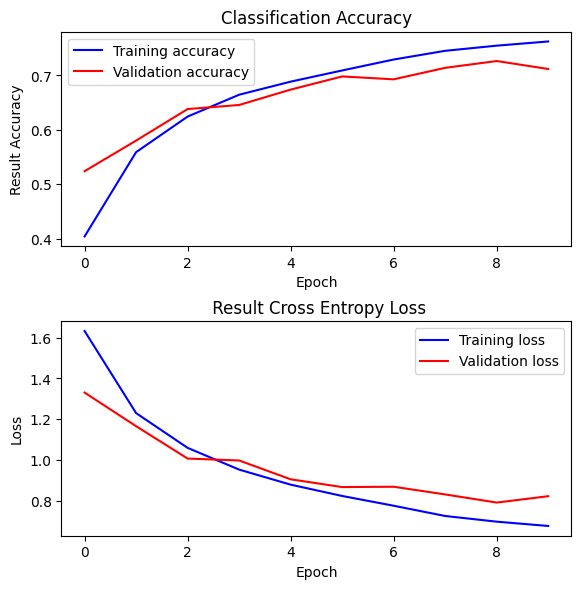

In [ ]:
#Visualize results loss function vs accuracy on the validation dataset
plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history3.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history3.history['val_accuracy'], color='red', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Result Accuracy')
plt.legend()
plt.subplot(212)
plt.title(' Result Cross Entropy Loss')
plt.plot(history3.history['loss'], color='blue', label='Training loss')
plt.plot(history3.history['val_loss'], color='red', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35)

In [ ]:
#as a last step, test the model on the testing dataset which is different from the validation dataset
loss3, accuracy3 = model3.evaluate(test_images)
print(f"Results on Testing dataset: loss {loss3}, Accuracy: {accuracy3}")




313/313 [==============================] - 1s 4ms/step - loss: 0.7930 - accuracy: 0.7343
Results on Testing dataset: loss 0.7930479049682617, Accuracy: 0.7343000173568726


In [ ]:
#compute recall and f1score scores
predictions = model3.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_truth = np.argmax(y_test, axis=1)

f1score3 = f1_score(y_truth, y_pred, average='weighted')
recall3 = recall_score(y_truth, y_pred, average='weighted')
print(f"Results on Testing dataset: Weighted F1-score: {f1score3}, Weighted Recall: {recall3}")





313/313 [==============================] - 1s 3ms/step
Results on Testing dataset: Weighted F1-score: 0.7294718880129744, Weighted Recall: 0.7343


In [ ]:
#saving results on testing dataset:  loss 0.7930479049682617, Accuracy: 0.7343000173568726
loss3= 0.7930479049682617
accuracy3= 0.7343000173568726
#saving results on testing dataset: Weighted F1-score: 0.7294718880129744, Weighted Recall: 0.7343
f1score3=  0.7294718880129744
recall3= 0.7343

#Model 3 Evaluation


SHORT PARAGRAPH (3 LINES) there is improvement/no improvement on loss/accuracy on traininig/validation sets >> derive a short conclusion on the effect of the hyperparamet on the efficiency of the model

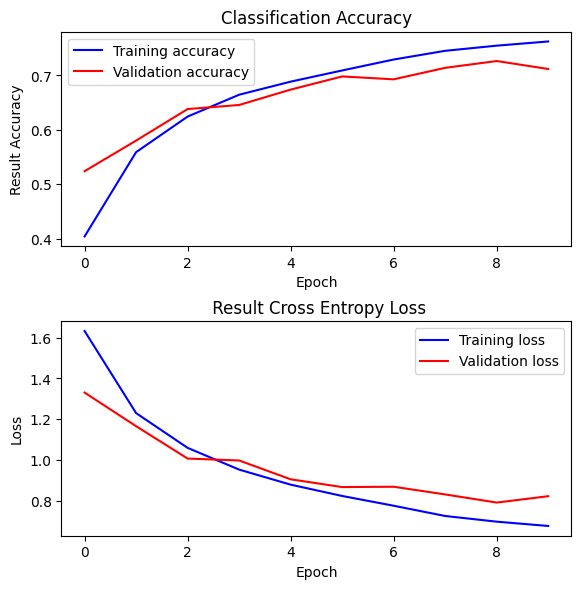


!!on training and validation dataset: loss: 0.6769 - accuracy: 0.7623 - val_loss: 0.8228 - val_accuracy: 0.7118

#Model 4: Batch size Hyperparameter

In Model 4, the batch size is increased from 128 from baseline model to 512:

In [ ]:
model4 = Sequential([
        # First Convolutional Layer
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        # Maxpolling layer
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Layer
        layers.Conv2D(64, (3, 3), activation="relu"),
        # Maxpolling layer
        layers.MaxPooling2D((2, 2)),

        # Flatten the results to feed into the output layer
        layers.Flatten(),

        # Output Layer
        layers.Dense(10, activation="softmax")
    ])

#initiate AGAIN the optimizer
optimizer = Adam(learning_rate=0.001)


 #Complile and Train model
model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer.build(model4.trainable_variables)
history4 = model1.fit(train_images, batch_size=512, epochs=10, validation_data=val_images, callbacks=[callback])


Epoch 1/10
1250/1250 [==============================] - 31s 24ms/step - loss: 0.9834 - accuracy: 0.6582 - val_loss: 1.0120 - val_accuracy: 0.6484
Epoch 2/10
1250/1250 [==============================] - 36s 29ms/step - loss: 0.9760 - accuracy: 0.6622 - val_loss: 1.0014 - val_accuracy: 0.6487
Epoch 3/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9608 - accuracy: 0.6665 - val_loss: 1.0036 - val_accuracy: 0.6579
Epoch 4/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.9566 - accuracy: 0.6695 - val_loss: 0.9578 - val_accuracy: 0.6650
Epoch 5/10
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9343 - accuracy: 0.6777 - val_loss: 0.9715 - val_accuracy: 0.6673
Epoch 6/10
1250/1250 [==============================] - 31s 24ms/step - loss: 0.9375 - accuracy: 0.6750 - val_loss: 0.9561 - val_accuracy: 0.6687
Epoch 7/10
1250/1250 [==============================] - 31s 25ms/step - loss: 0.9247 - accuracy: 0.6811 - val_loss: 1.0395 -

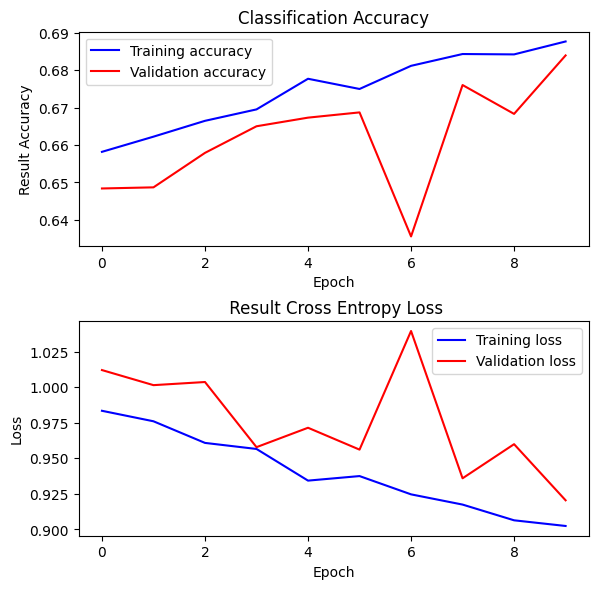

In [ ]:
#Visualize results loss function vs accuracy on the validation dataset
plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history4.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history4.history['val_accuracy'], color='red', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Result Accuracy')
plt.legend()
plt.subplot(212)
plt.title(' Result Cross Entropy Loss')
plt.plot(history4.history['loss'], color='blue', label='Training loss')
plt.plot(history4.history['val_loss'], color='red', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35)


In [ ]:
#as a last step, test the model on the testing dataset which is different from the validation dataset
loss4, accuracy4 = model4.evaluate(test_images)
print(f"Results on Testing dataset: loss {loss4}, Accuracy: {accuracy4}")



313/313 [==============================] - 2s 5ms/step - loss: 2.3066 - accuracy: 0.0956
Results on Testing dataset: loss 2.3066248893737793, Accuracy: 0.09560000151395798


In [ ]:
#compute recall and f1score scores
predictions = model4.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_truth = np.argmax(y_test, axis=1)

f1score4 = f1_score(y_truth, y_pred, average='weighted')
recall4 = recall_score(y_truth, y_pred, average='weighted')
print(f"Results on Testing dataset: Weighted F1-score: {f1score4}, Weighted Recall: {recall4}")



313/313 [==============================] - 1s 2ms/step
Results on Testing dataset: Weighted F1-score: 0.04480379231334193, Weighted Recall: 0.0956


In [ ]:
#saving result on testing dataset: loss: 2.3066 - accuracy: 0.0956
loss4= 2.3066
accuracy4= 0.0956
#saving result on testing dataset: F1-score: 0.04480379231334193, Weighted Recall: 0.0956
f1score4= 0.04480379231334193
recall4= 0.0956

#Model 4 Evaluation

SHORT PARAGRAPH (3 LINES) there is improvement/no improvement on loss/accuracy on traininig/validation sets >> derive a short conclusion on the effect of the hyperparamet on the efficiency of the model

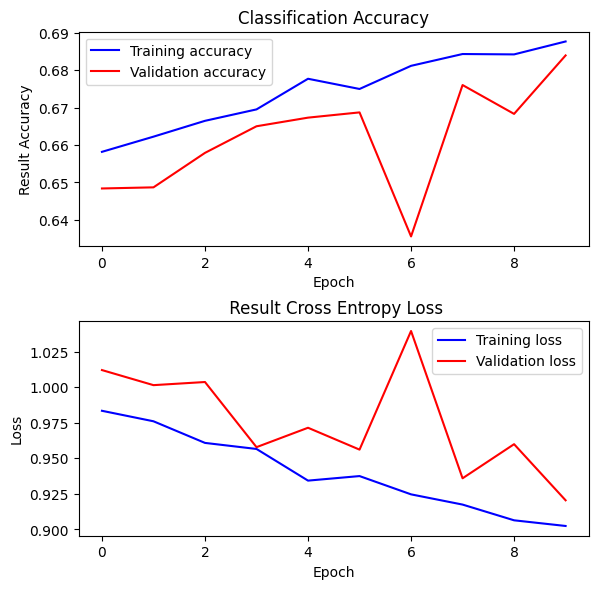

>!!on training and validation data: loss: 0.9024 - accuracy: 0.6876 - val_loss: 0.9205 - val_accuracy: 0.6839

#Model 5: Epoch Hyperparameter

In model 5, the Epoch is increased from 10 in base model to 30:

In [ ]:
model5 = Sequential([
        # First Convolutional Layer
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        # Maxpolling layer
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Layer
        layers.Conv2D(64, (3, 3), activation="relu"),
        # Maxpolling layer
        layers.MaxPooling2D((2, 2)),

        # Flatten the results to feed into the output layer
        layers.Flatten(),

        # Output Layer
        layers.Dense(10, activation="softmax")
    ])

#initiate AGAIN the optimizer
optimizer = Adam(learning_rate=0.001)
callback = EarlyStopping(monitor='val_loss', patience=3)


 #Complile and Train model
model5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer.build(model5.trainable_variables)
history5 = model5.fit(train_images, batch_size=128, epochs=30, validation_data=val_images, callbacks=[callback])

Epoch 1/30
1250/1250 [==============================] - 38s 27ms/step - loss: 1.6217 - accuracy: 0.4154 - val_loss: 1.4021 - val_accuracy: 0.5024
Epoch 2/30
1250/1250 [==============================] - 32s 26ms/step - loss: 1.3511 - accuracy: 0.5239 - val_loss: 1.2826 - val_accuracy: 0.5492
Epoch 3/30
1250/1250 [==============================] - 34s 27ms/step - loss: 1.2376 - accuracy: 0.5616 - val_loss: 1.1876 - val_accuracy: 0.5851
Epoch 4/30
1250/1250 [==============================] - 32s 25ms/step - loss: 1.1693 - accuracy: 0.5916 - val_loss: 1.1255 - val_accuracy: 0.5995
Epoch 5/30
1250/1250 [==============================] - 33s 27ms/step - loss: 1.1239 - accuracy: 0.6058 - val_loss: 1.0964 - val_accuracy: 0.6229
Epoch 6/30
1250/1250 [==============================] - 49s 39ms/step - loss: 1.0912 - accuracy: 0.6180 - val_loss: 1.0481 - val_accuracy: 0.6389
Epoch 7/30
1250/1250 [==============================] - 32s 26ms/step - loss: 1.0641 - accuracy: 0.6293 - val_loss: 1.0376 -

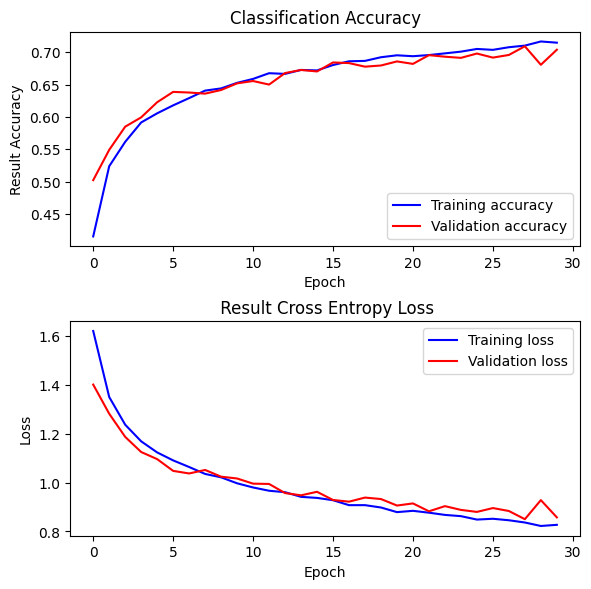

In [ ]:
#Visualize results loss function vs accuracy on the validation dataset
plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history5.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history5.history['val_accuracy'], color='red', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Result Accuracy')
plt.legend()
plt.subplot(212)
plt.title(' Result Cross Entropy Loss')
plt.plot(history5.history['loss'], color='blue', label='Training loss')
plt.plot(history5.history['val_loss'], color='red', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35)


In [ ]:
#as a last step, test the model on the testing dataset which is different from the validation dataset
loss5, accuracy5 = model5.evaluate(test_images)
print(f"Results on Testing dataset: loss {loss5}, Accuracy: {accuracy5}")




313/313 [==============================] - 1s 4ms/step - loss: 0.8090 - accuracy: 0.7347
Results on Testing dataset: loss 0.8089708089828491, Accuracy: 0.7347000241279602


In [ ]:
#compute recall and f1score scores
predictions = model5.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_truth = np.argmax(y_test, axis=1)

f1score5 = f1_score(y_truth, y_pred, average='weighted')
recall5 = recall_score(y_truth, y_pred, average='weighted')
print(f"Results on Testing dataset: Weighted F1-score: {f1score5}, Weighted Recall: {recall5}")





313/313 [==============================] - 1s 2ms/step
Results on Testing dataset: Weighted F1-score: 0.7288777905988015, Weighted Recall: 0.7347


In [ ]:
#saving results on testing set:  loss: 0.8090 - accuracy: 0.7347
loss5= 0.8090
accuracy5=  0.7347
#saving results on testing set: F1-score: F1-score: 0.7288777905988015, Weighted Recall: 0.7347
f1score5= 0.7288777905988015
recall5= 0.7347


#Model 5 Evaluation:

SHORT PARAGRAPH (3 LINES) there is improvement/no improvement on loss/accuracy on traininig/validation sets >> derive a short conclusion on the effect of the hyperparamet on the efficiency of the model

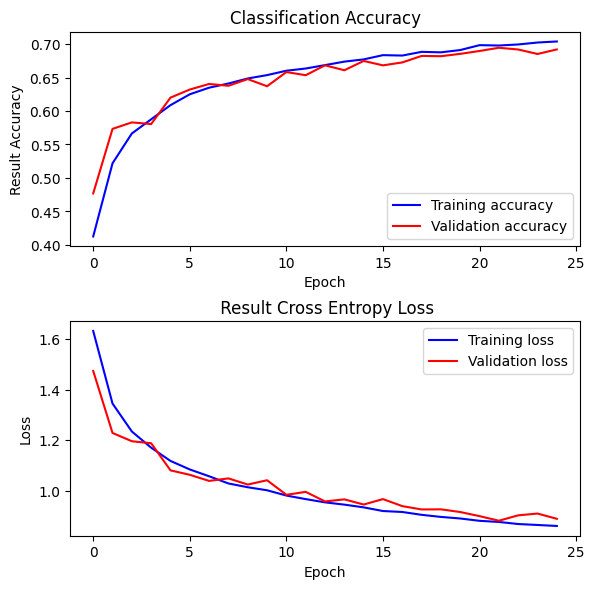



!!on training and validation data: loss: 0.8270 - accuracy: 0.7150 - val_loss: 0.8576 - val_accuracy: 0.7041



# MODEL 6: Dropout Rate Hyperparameter (Dropout Regularization)

In model 6, the following changes were added:
* Added Droupout rate of p=0.2 (keep probability=0.8) at input layer
* Added Droupout rate of p=0.4 (keep probability=0.6) after the last pooling layer  

As a general rule the dropout should be added after the last pooling layer as well as the input layer.




In [ ]:

model6 = Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    # Dropout at the input layer
    Dropout(0.2),
    # Max Pooling Layer
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation="relu"),
    # Max Pooling Layer
    layers.MaxPooling2D((2, 2)),
    # Dropout after the last pooling layer
    Dropout(0.4),

    # Flatten the results to feed into the output layer
    layers.Flatten(),

    # Output Layer
    layers.Dense(10, activation="softmax")
])

# Reinitialize the optimizer
optimizer = Adam(learning_rate=0.001)

# Compile and Train model
model6.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer.build(model6.trainable_variables)
history6 = model6.fit(train_images, batch_size=128, epochs=10, validation_data=val_images, callbacks=[callback])


Epoch 1/10
1250/1250 [==============================] - 40s 28ms/step - loss: 1.6893 - accuracy: 0.3868 - val_loss: 1.5191 - val_accuracy: 0.4663
Epoch 2/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.4428 - accuracy: 0.4875 - val_loss: 1.3526 - val_accuracy: 0.5361
Epoch 3/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.3426 - accuracy: 0.5253 - val_loss: 1.2782 - val_accuracy: 0.5585
Epoch 4/10
1250/1250 [==============================] - 29s 24ms/step - loss: 1.2777 - accuracy: 0.5502 - val_loss: 1.2235 - val_accuracy: 0.5755
Epoch 5/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2373 - accuracy: 0.5659 - val_loss: 1.1952 - val_accuracy: 0.5869
Epoch 6/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.2059 - accuracy: 0.5752 - val_loss: 1.1775 - val_accuracy: 0.6032
Epoch 7/10
1250/1250 [==============================] - 29s 23ms/step - loss: 1.1813 - accuracy: 0.5857 - val_loss: 1.1043 -

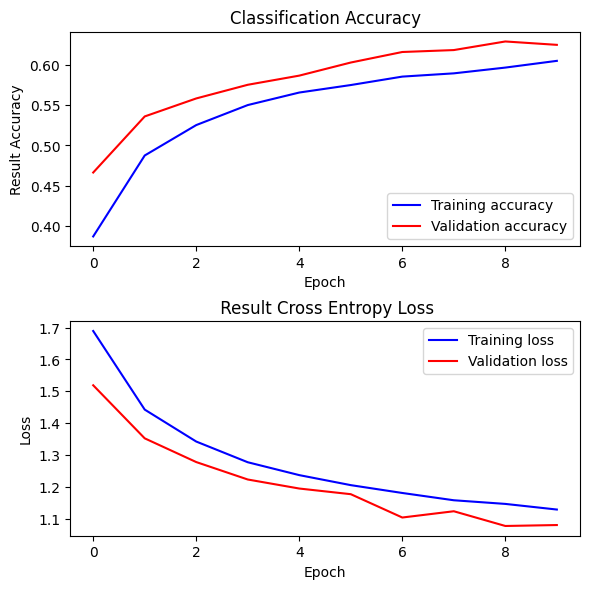

In [ ]:
#Visualize results loss function vs accuracy on the validation dataset
plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history6.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history6.history['val_accuracy'], color='red', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Result Accuracy')
plt.legend()
plt.subplot(212)
plt.title(' Result Cross Entropy Loss')
plt.plot(history6.history['loss'], color='blue', label='Training loss')
plt.plot(history6.history['val_loss'], color='red', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35)

In [ ]:
#as a last step, test the model on the testing dataset which is different from the validation dataset
loss6, accuracy6 = model6.evaluate(test_images)
print(f"Results on Testing dataset: loss {loss6}, Accuracy: {accuracy6}")


313/313 [==============================] - 2s 6ms/step - loss: 0.9601 - accuracy: 0.6756
Results on Testing dataset: loss 0.9600957036018372, Accuracy: 0.675599992275238


In [ ]:
#compute recall and f1score scores
predictions = model6.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_truth = np.argmax(y_test, axis=1)

f1score6 = f1_score(y_truth, y_pred, average='weighted')
recall6 = recall_score(y_truth, y_pred, average='weighted')
print(f"Results on Testing dataset: Weighted F1-score: {f1score6}, Weighted Recall: {recall6}")




313/313 [==============================] - 1s 2ms/step
Results on Testing dataset: Weighted F1-score: 0.6696482416345876, Weighted Recall: 0.6756


In [ ]:
#saving results on testing dataset: loss: 0.9601 - accuracy: 0.6756
loss6= 0.9601
accuracy6= 0.6756
#saving results on testing dataset:   F1-score: 0.6696482416345876, Weighted Recall: 0.6756
f1score6= 0.6696482416345876
recall6= 0.6756

#Model 6 Evaluation:


SHORT PARAGRAPH (3 LINES) there is improvement/no improvement on loss/accuracy on traininig/validation sets >> derive a short conclusion on the effect of the hyperparamet on the efficiency of the model


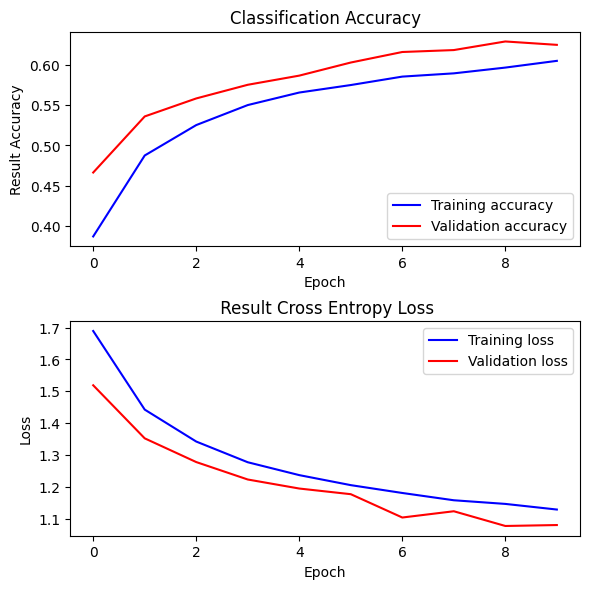



!!on training and validation data: loss: 1.1293 - accuracy: 0.6053 - val_loss: 1.0807 - val_accuracy: 0.6252



# MODEL 7: Optimizer Hyperparameter

In model 7, we overwrite the optimizer from Adam to SGD but you can test with other algorithm optimizers as shown in the commented code below:

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
#tf.keras.optimizers.RMSprop(learning_rate=0.001)
#tf.keras.optimizers.Adagrad(learning_rate=0.01)

model7 = Sequential([
        # First Convolutional Layer
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        # Maxpolling layer
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Layer
        layers.Conv2D(64, (3, 3), activation="relu"),
        # Maxpolling layer
        layers.MaxPooling2D((2, 2)),

        # Flatten the results to feed into the output layer
        layers.Flatten(),

        # Output Layer
        layers.Dense(10, activation="softmax")
    ])

#initiate AGAIN the optimizer
optimizer = Adam(learning_rate=0.001)


 #Complile and Train model
model7.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer.build(model7.trainable_variables)
history7 = model7.fit(train_images, batch_size=128, epochs=10, validation_data=val_images, callbacks=[callback])


Epoch 1/10
1250/1250 [==============================] - 47s 37ms/step - loss: 1.6561 - accuracy: 0.4079 - val_loss: 1.4414 - val_accuracy: 0.4891
Epoch 2/10
  22/1250 [..............................] - ETA: 21s - loss: 1.5452 - accuracy: 0.4688

KeyboardInterrupt: 

In [ ]:
#Visualize results loss function vs accuracy on the validation dataset
plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history7.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history7.history['val_accuracy'], color='red', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Result Accuracy')
plt.legend()
plt.subplot(212)
plt.title(' Result Cross Entropy Loss')
plt.plot(history7.history['loss'], color='blue', label='Training loss')
plt.plot(history7.history['val_loss'], color='red', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35)

In [ ]:
#as a last step, test the model on the testing dataset which is different from the validation dataset
loss7, accuracy7 = model7.evaluate(test_images)
print(f"Results on Testing dataset: loss {loss7}, Accuracy: {accuracy7}")


313/313 [==============================] - 1s 4ms/step - loss: 0.9201 - accuracy: 0.6819
Results on Testing dataset: loss 0.9200593829154968, Accuracy: 0.6819000244140625


In [ ]:
#compute recall and f1score scores
predictions = model7.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_truth = np.argmax(y_test, axis=1)

f1score7 = f1_score(y_truth, y_pred, average='weighted')
recall7 = recall_score(y_truth, y_pred, average='weighted')
print(f"Results on Testing dataset: Weighted F1-score: {f1score7}, Weighted Recall: {recall7}")




313/313 [==============================] - 1s 2ms/step
Results on Testing dataset: Weighted F1-score: 0.6719030613414155, Weighted Recall: 0.6819


In [ ]:
#saving results on testing dataset: loss: 0.9201 - accuracy: 0.6819
loss7= 0.9201
accuracy7= 0.6819
#saving results on testing dataset: F1-score: 0.6719030613414155, Weighted Recall: 0.6819
f1score7 = 0.6719030613414155
recall7 = 0.6819

#Model 7 Evaluation:

SHORT PARAGRAPH (3 LINES) there is improvement/no improvement on loss/accuracy on traininig/validation sets >> derive a short conclusion on the effect of the hyperparamet on the efficiency of the model

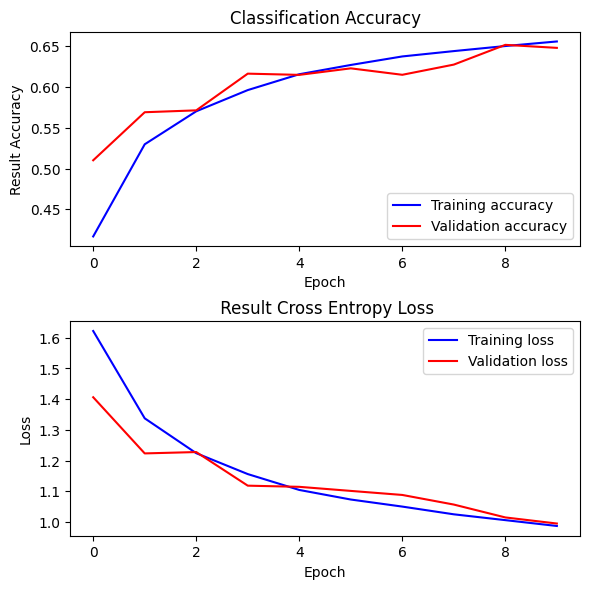

!!on training and validation data:  loss: 0.9868 - accuracy: 0.6557 - val_loss: 0.9948 - val_accuracy: 0.6479



# MODEL 8: Activation functions  

In model 8, the ReLu activation functions is replaced with LeakyReLu for the first convolutional layers:

It is possible to test with other activation functions such as: Exponential Linear Units (ELUs), Swish, Sigmoid, Gaussian Error Linear Unit (GELU),Hyperbolic Tangent (Tanh), etc
   

In [ ]:

model8 = Sequential([
    # First Convolutional Layer with LeakyReLU
    layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    layers.LeakyReLU(alpha=0.1),
    # Max Pooling Layer
    layers.MaxPooling2D((2, 2)),
    # Second Convolutional Layer with LeakyReLU
    layers.Conv2D(64, (3, 3)),
    layers.LeakyReLU(alpha=0.1),
    # Max Pooling Layer
    layers.MaxPooling2D((2, 2)),
    # Flatten results
    layers.Flatten(),
    # Output Layer
    layers.Dense(10, activation="softmax")
])

#initiate AGAIN the optimizer
optimizer = Adam(learning_rate=0.001)


 #Complile and Train model
model8.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimizer.build(model8.trainable_variables)
history8 = model8.fit(train_images, batch_size=128, epochs=10, validation_data=val_images, callbacks=[callback])

Epoch 1/10
1250/1250 [==============================] - 32s 25ms/step - loss: 1.6452 - accuracy: 0.4076 - val_loss: 1.4368 - val_accuracy: 0.4904
Epoch 2/10
1250/1250 [==============================] - 33s 26ms/step - loss: 1.3487 - accuracy: 0.5235 - val_loss: 1.2406 - val_accuracy: 0.5610
Epoch 3/10
1250/1250 [==============================] - 31s 25ms/step - loss: 1.2277 - accuracy: 0.5702 - val_loss: 1.1708 - val_accuracy: 0.5890
Epoch 4/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.1641 - accuracy: 0.5910 - val_loss: 1.1037 - val_accuracy: 0.6142
Epoch 5/10
1250/1250 [==============================] - 32s 26ms/step - loss: 1.1258 - accuracy: 0.6093 - val_loss: 1.1613 - val_accuracy: 0.5928
Epoch 6/10
1250/1250 [==============================] - 30s 24ms/step - loss: 1.0856 - accuracy: 0.6236 - val_loss: 1.0965 - val_accuracy: 0.6157
Epoch 7/10
1250/1250 [==============================] - 36s 29ms/step - loss: 1.0579 - accuracy: 0.6300 - val_loss: 1.0603 -

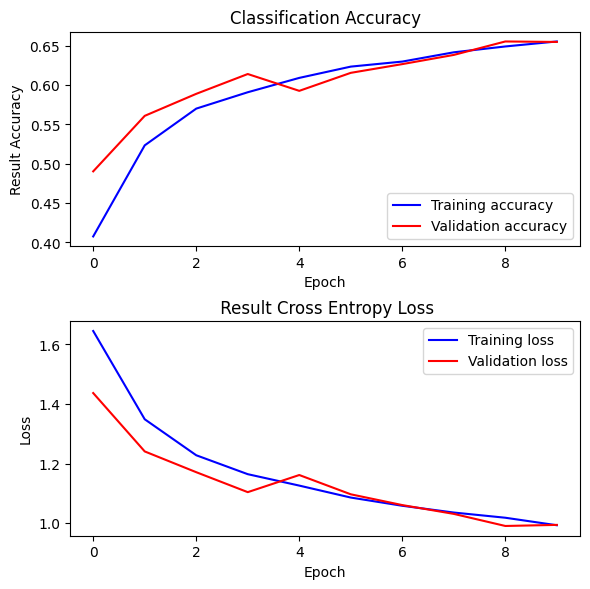

In [ ]:
#Visualize results loss function vs accuracy on the validation dataset
plt.figure(figsize=(6, 6))
plt.subplot(211)
plt.title('Classification Accuracy')
plt.plot(history8.history['accuracy'], color='blue', label='Training accuracy')
plt.plot(history8.history['val_accuracy'], color='red', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Result Accuracy')
plt.legend()
plt.subplot(212)
plt.title(' Result Cross Entropy Loss')
plt.plot(history8.history['loss'], color='blue', label='Training loss')
plt.plot(history8.history['val_loss'], color='red', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35)

#saving results on testing dataset:



In [ ]:
#as a last step, test the model on the testing dataset which is different from the validation dataset
loss8, accuracy8 = model8.evaluate(test_images)
print(f"Results on Testing dataset: loss {loss8}, Accuracy: {accuracy8}")


313/313 [==============================] - 2s 6ms/step - loss: 0.9028 - accuracy: 0.6942
Results on Testing dataset: loss 0.9028307795524597, Accuracy: 0.6941999793052673


In [ ]:
#compute recall and f1score scores
predictions = model8.predict(x_test)
y_pred = np.argmax(predictions, axis=1)
y_truth = np.argmax(y_test, axis=1)

f1score8 = f1_score(y_truth, y_pred, average='weighted')
recall8 = recall_score(y_truth, y_pred, average='weighted')
print(f"Results on Testing dataset: Weighted F1-score: {f1score8}, Weighted Recall: {recall8}")


313/313 [==============================] - 1s 2ms/step
Results on Testing dataset: Weighted F1-score: 0.6903713758594853, Weighted Recall: 0.6942


In [ ]:
#saving results on testing dataset: loss 0.9028307795524597, Accuracy: 0.6941999793052673
loss8=0.9028307795524597
accuracy8=0.6941999793052673
#saving results on testing dataset: F1-score: 0.6903713758594853, Weighted Recall: 0.6942
f1score8= 0.6903713758594853
recall8= 0.6942


#Model 8 Evaluation:

SHORT PARAGRAPH (3 LINES) there is improvement/no improvement on loss/accuracy on traininig/validation sets >> derive a short conclusion on the effect of the hyperparamet on the efficiency of the model

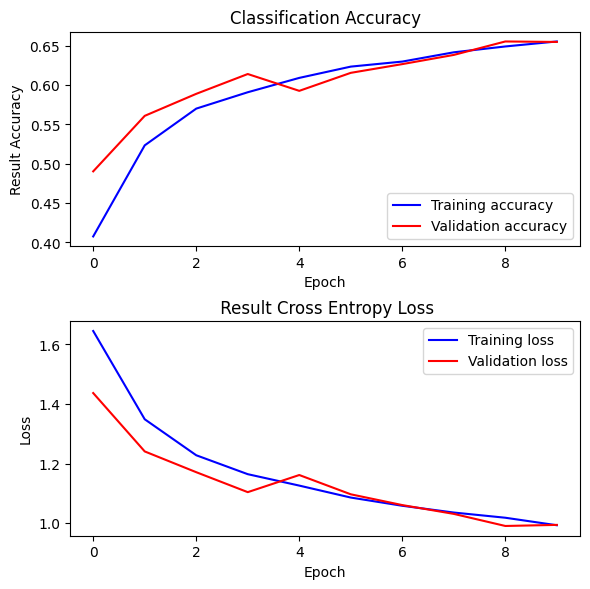


!!on training and validation data: loss: 0.9925 - accuracy: 0.6556 - val_loss: 0.9937 - val_accuracy: 0.6550



# RESULTS ANALYSIS

The performance of the 8 models is evaluated on the testing dataset using the following metrics loss, accuracy, f1score and recall. The first remark is that the graphs show similar results on the seperate performance of the moels. Results show that the only models that showed improvement from the baseline model are: models 3 and 5. While models 6, 7 and 8 give performance results close to model 1. We also notice that there is degradation in models 2 and 4. Model 4 shows extremely low recall (misses relevant instances) and precision (has many false positives). But based on the f1score and recall results for all the models, this is relatively true for all models as all scores are < 0.7 which is relatively a low score. As a final deduction, from the baseline model increasing the # of epochs and convolutional layers can directly increase the performance of the model. However, it is important to note that tuning the other hyperparameters that were test in the other models and finding the right values will significantly increase the performance of the model. Moreover, these hyperparameters can be combined for better results.

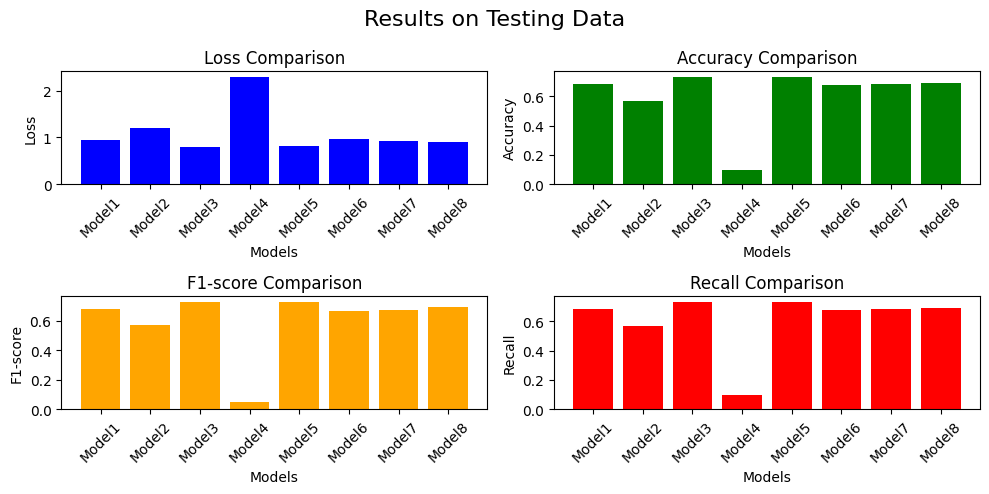

In [ ]:
losses = [loss1, loss2, loss3, loss4, loss5, loss6, loss7, loss8]
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7, accuracy8]
f1_scores = [f1score1, f1score2, f1score3, f1score4, f1score5, f1score6, f1score7, f1score8]
recalls = [recall1, recall2, recall3, recall4, recall5, recall6, recall7, recall8]

models = ['Model1', 'Model2', 'Model3', 'Model4', 'Model5', 'Model6', 'Model7', 'Model8']

plt.figure(figsize=(10, 5))
plt.suptitle("Results on Testing Data", fontsize=16)


plt.subplot(2, 2, 1)
plt.bar(models, losses, color='blue')
plt.title('Loss Comparison')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xticks(rotation=45)


plt.subplot(2, 2, 2)
plt.bar(models, accuracies, color='green')
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)


plt.subplot(2, 2, 3)
plt.bar(models, f1_scores, color='orange')
plt.title('F1-score Comparison')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.xticks(rotation=45)


plt.subplot(2, 2, 4)
plt.bar(models, recalls, color='red')
plt.title('Recall Comparison')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(rotation=45)


plt.tight_layout()


plt.show()
